In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [2]:
# Loading the dataset
data = pd.read_csv("train.csv") 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28831 non-null  int64  
 1   age         28831 non-null  int64  
 2   job         28831 non-null  object 
 3   civil       28831 non-null  object 
 4   edu         28831 non-null  object 
 5   credit      28831 non-null  object 
 6   hloan       28831 non-null  object 
 7   ploan       28831 non-null  object 
 8   ctype       28831 non-null  object 
 9   month       28831 non-null  object 
 10  day         28831 non-null  object 
 11  ccontact    28831 non-null  int64  
 12  lcdays      28831 non-null  int64  
 13  pcontact    28831 non-null  int64  
 14  presult     28831 non-null  object 
 15  employment  28831 non-null  float64
 16  cprice      28831 non-null  float64
 17  cconf       28831 non-null  float64
 18  euri3       28831 non-null  float64
 19  employees   28831 non-nul

In [3]:
data.describe()

,id,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees,outcome
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,120599.451042,40.080296,2.574867,962.323124,0.170823,0.081249,93.574302,-40.496743,3.622575,5167.135174,0.111304
std,11872.139828,10.426239,2.780901,187.277267,0.486648,1.572366,0.579193,4.642811,1.733652,72.072751,0.314513
min,100001.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,110316.500000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,120602.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,130905.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,141188.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


There are no missing values in the dataset. So we don't need to handle missing data for this case study

In [4]:
data.head()

,id,age,job,civil,edu,credit,hloan,ploan,ctype,month,...,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,127087,32,technician,married,university,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,104222,27,services,single,9K,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,126970,57,services,divorced,unknown,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,123366,42,entrepreneur,married,university,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,100832,49,technician,married,apprenticeship,no,no,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head()
test.columns

Index(['id', 'age', 'job', 'civil', 'edu', 'credit', 'hloan', 'ploan', 'ctype',
       'month', 'day', 'ccontact', 'lcdays', 'pcontact', 'presult',
       'employment', 'cprice', 'cconf', 'euri3', 'employees'],
      dtype='object')

In [7]:
print(data["job"].value_counts())
print("*"*25)
print(data["civil"].value_counts())
print("*"*25)
print(data["edu"].value_counts())

admin.          7255
artisan         6540
technician      4668
services        2779
management      2033
retired         1218
selfemployed    1014
entrepreneur    1010
housemaid        759
unemployed       730
student          597
unknown          228
Name: job, dtype: int64
*************************
married     17512
single       8065
divorced     3198
unknown        56
Name: civil, dtype: int64
*************************
university        8439
12K               6679
9K                4250
apprenticeship    3656
4K                2982
6K                1602
unknown           1208
illiterate          15
Name: edu, dtype: int64


In [8]:
print(data["outcome"].value_counts())

0    25622
1     3209
Name: outcome, dtype: int64


From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

In [9]:
data.shape

(28831, 21)

<h1>Exploratory Data Analysis</h1>

Distribution of Class variable

In [10]:
  plt.figure(figsize=(8,6))
Y = data["outcome"]
  total = len(Y)*1.
ax=sns.countplot(x="outcome", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.show()

<IPython.core.display.Javascript object>

<h1>Univariate Analysis</h1>

In [11]:
def countplot(label, data):
    plt.figure(figsize=(15,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=data)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()


In [12]:
%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

   #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
   #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
   # ax.legend(labels=["no","yes"])
    plt.show()

## Feature: Job (Categorical variable)

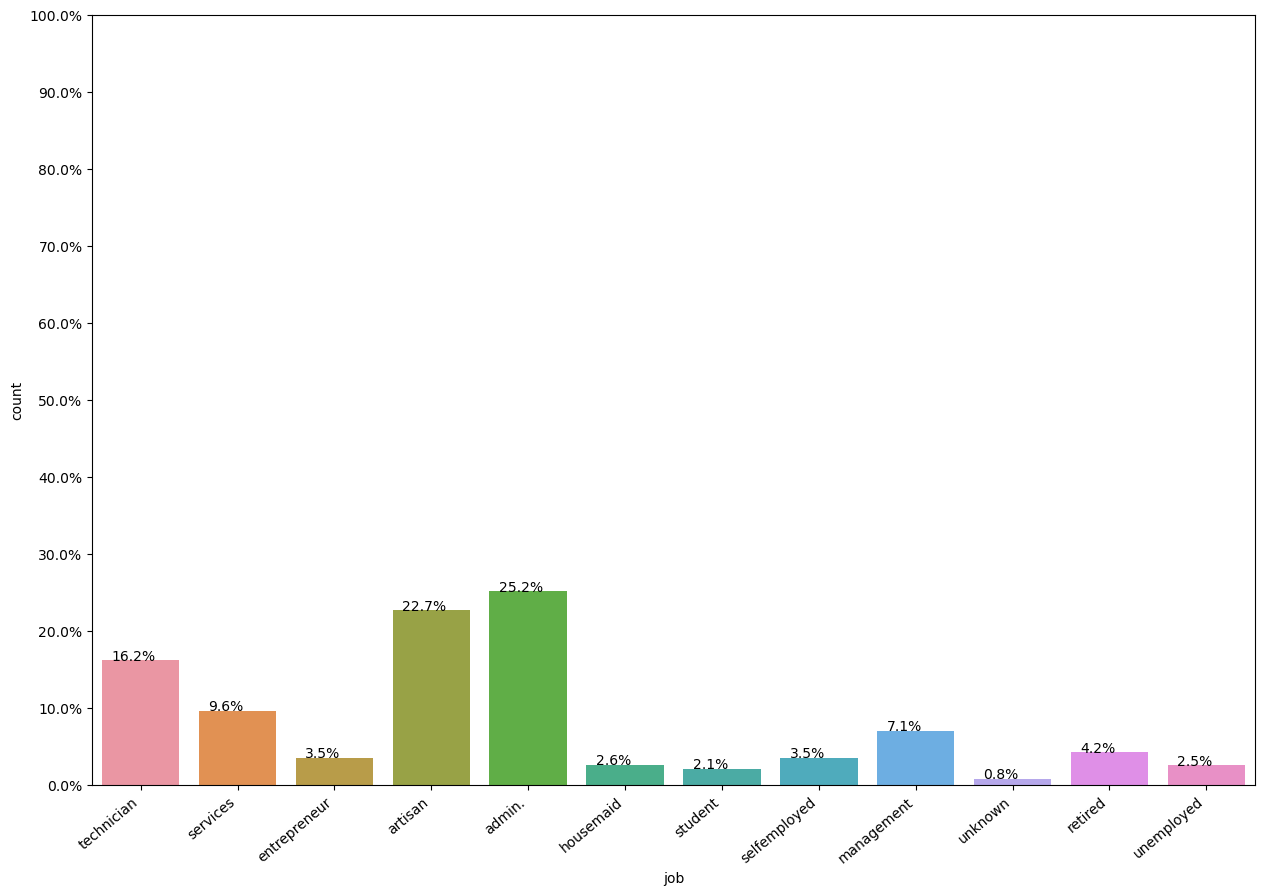

In [13]:
countplot("job", data)

From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

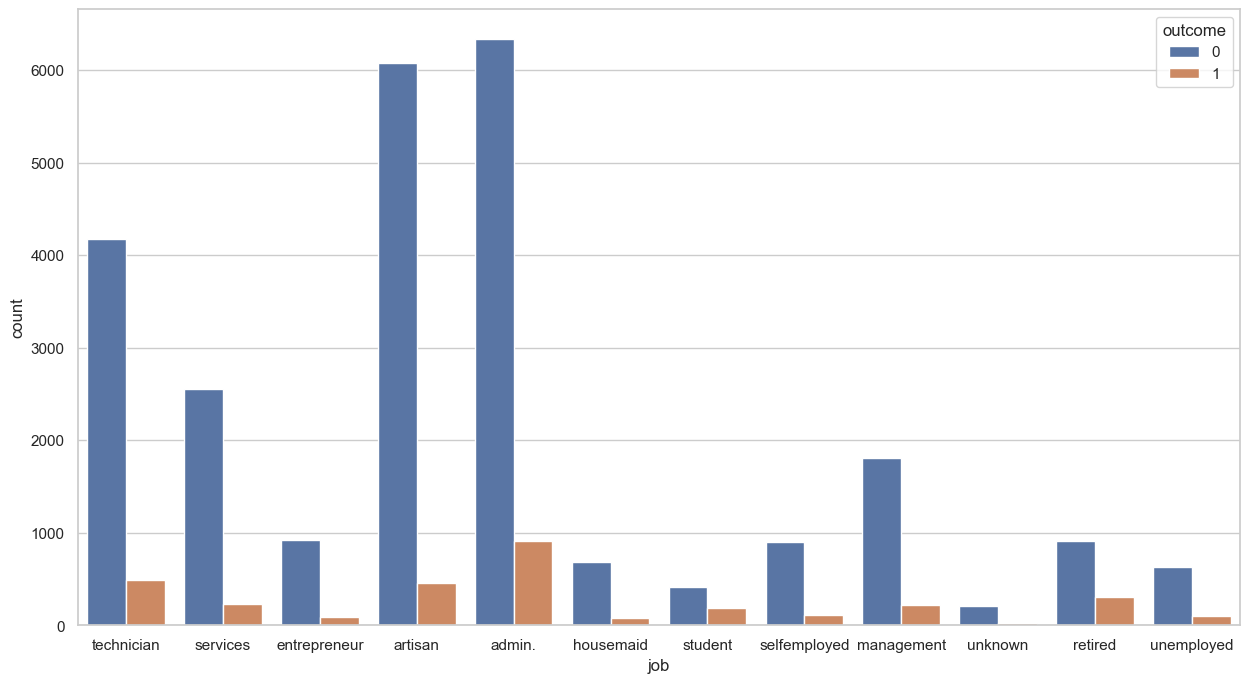

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="job", hue="outcome", data=data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of opening a saving account, but they are also the highest when it comes to not not opening. This is simply because we have more customers working as admin than any other profession. 

We can find out the odds or ratio of opening and not opening based on the profession, to find out which profession has the highest odds of opening given the data. At this point we are not sure if there is any correlation between job and target variable.

**Idea:** If we find that odds of one profession opening is greater than other job, we can use the odds or log(odds) as a feature by replacing jobs field with the odds, instead of doing one hot encoding.

## Feature: Civil (Categorical feature)

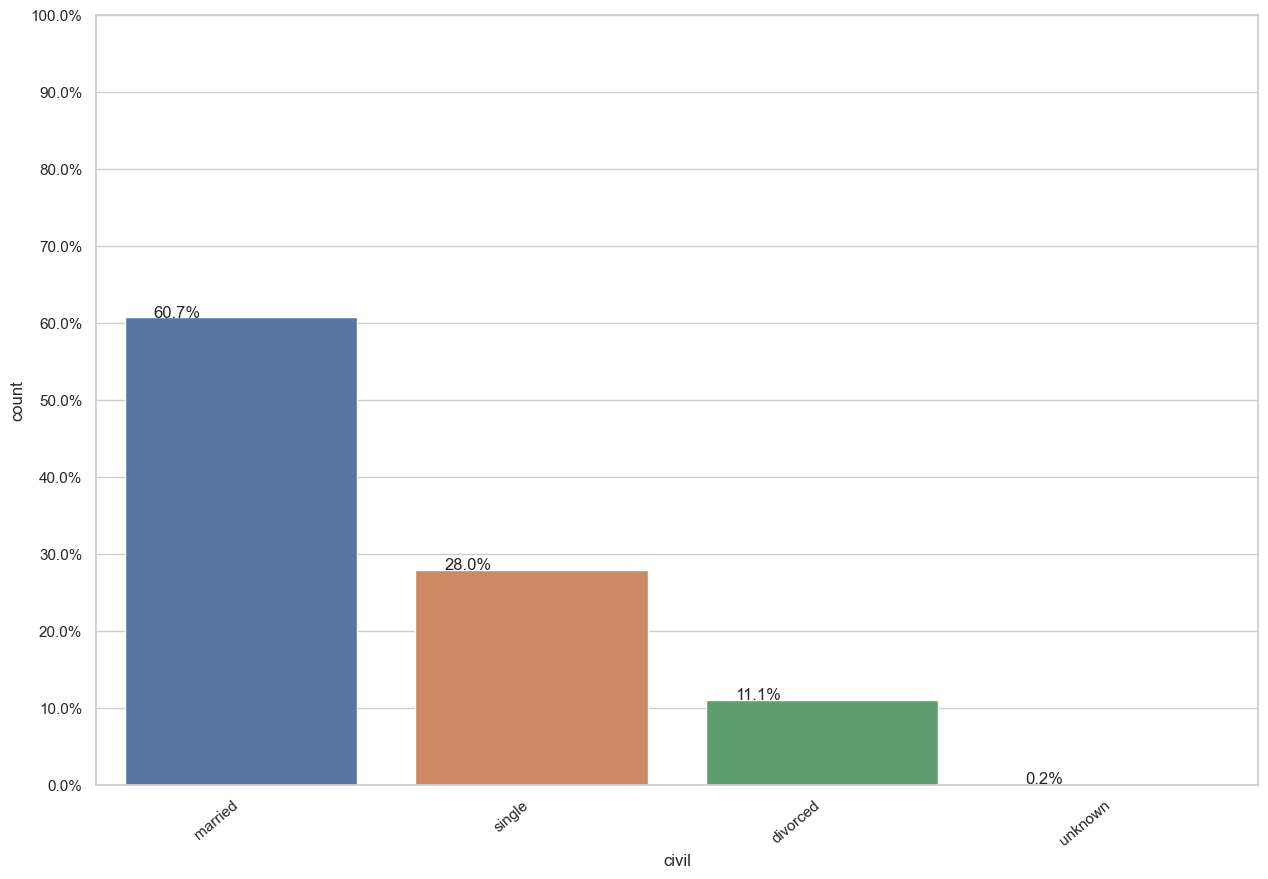

In [15]:
countplot("civil", data)

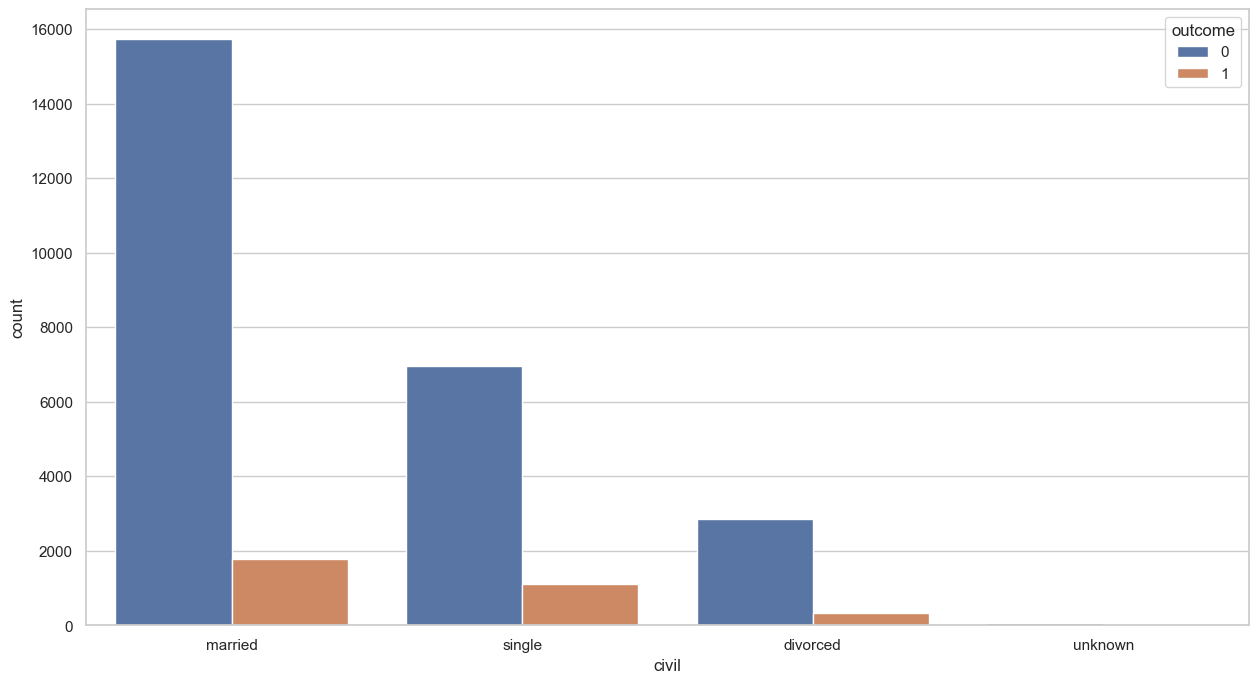

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="civil", hue="outcome", data=data)

## Feature: Credit (categorical)

This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

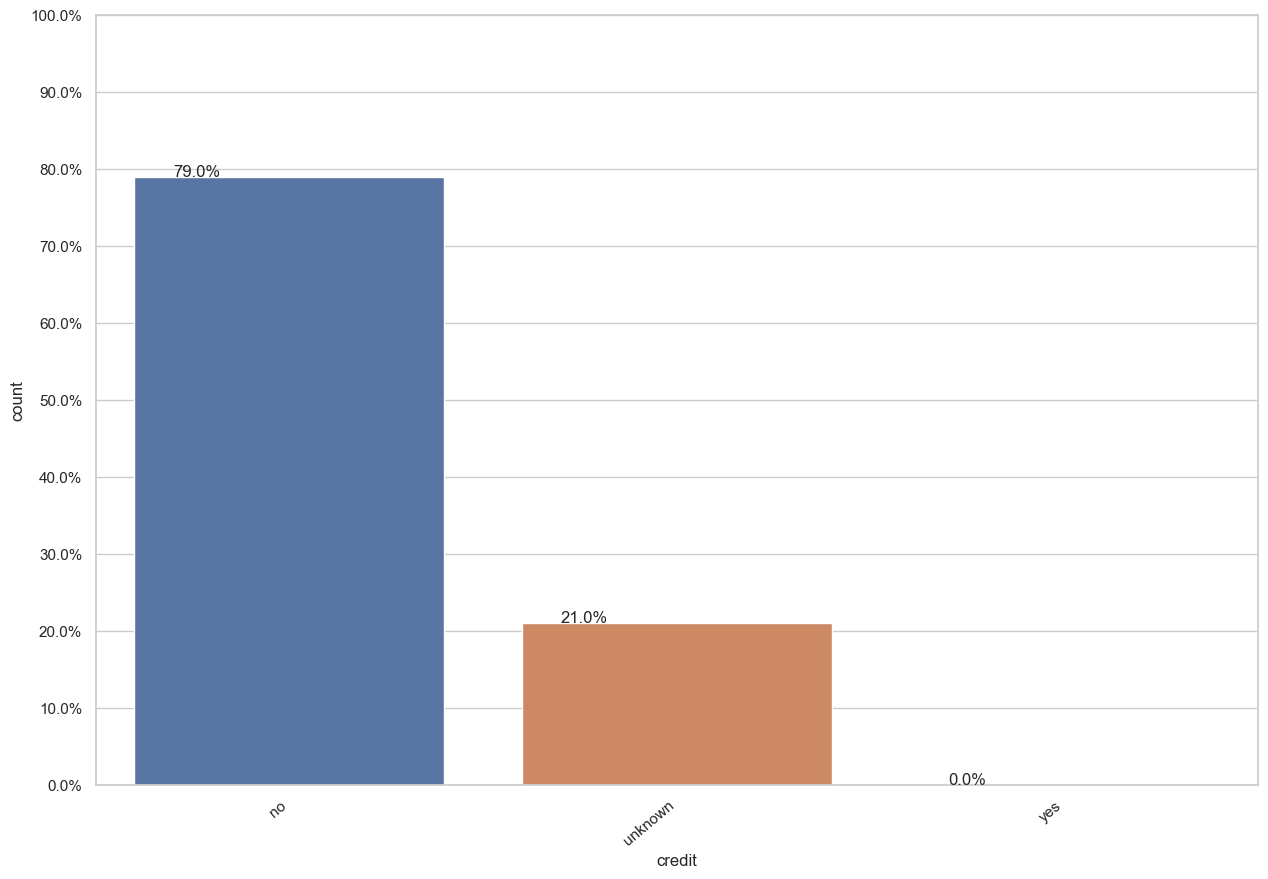

In [17]:
countplot("credit", data)

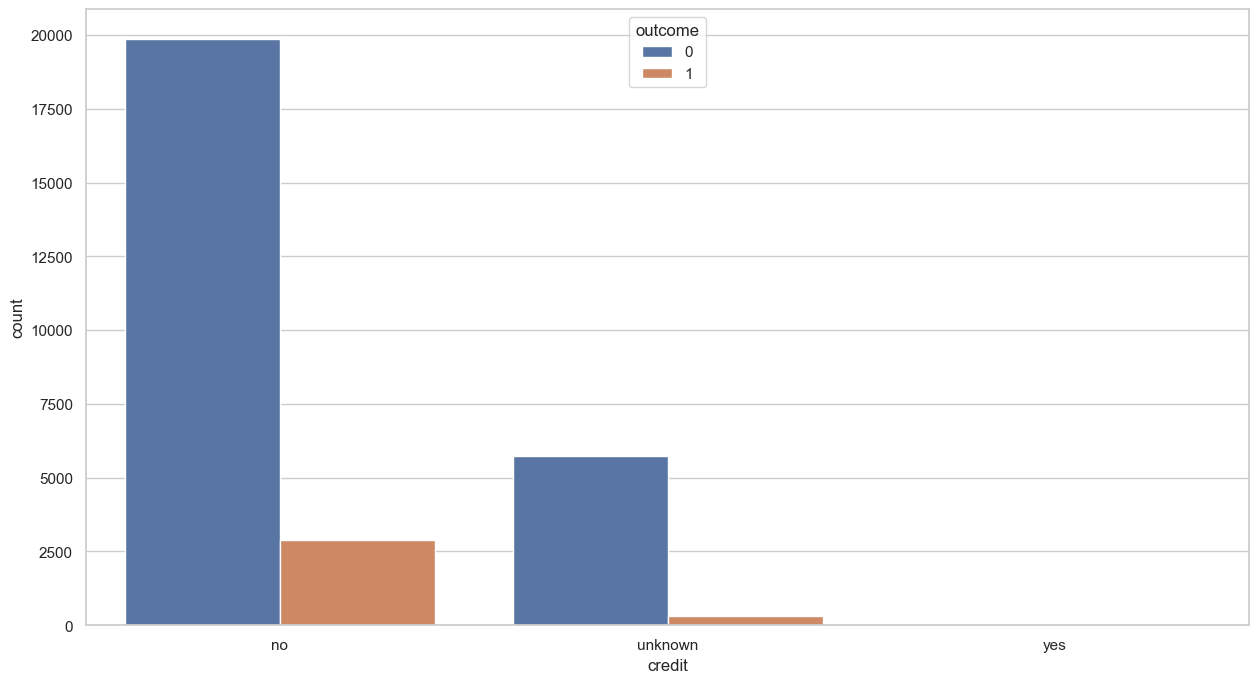

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="credit", hue="outcome", data=data)

There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

## Feature: Education
This is a categorical feature which means "has some level of education", with the values "University","Basic 9 years" and "unknown" etc.

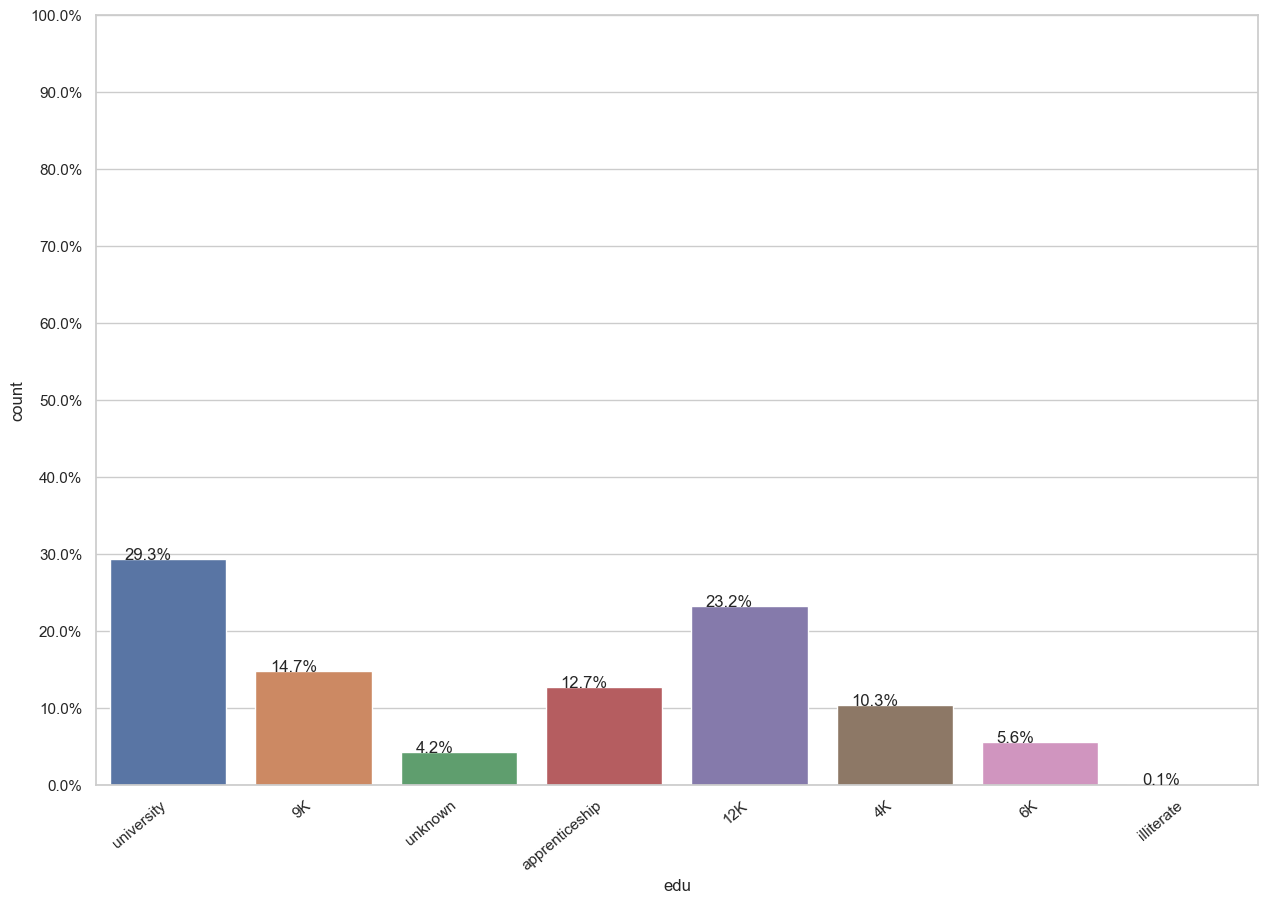

In [19]:
countplot("edu",data)

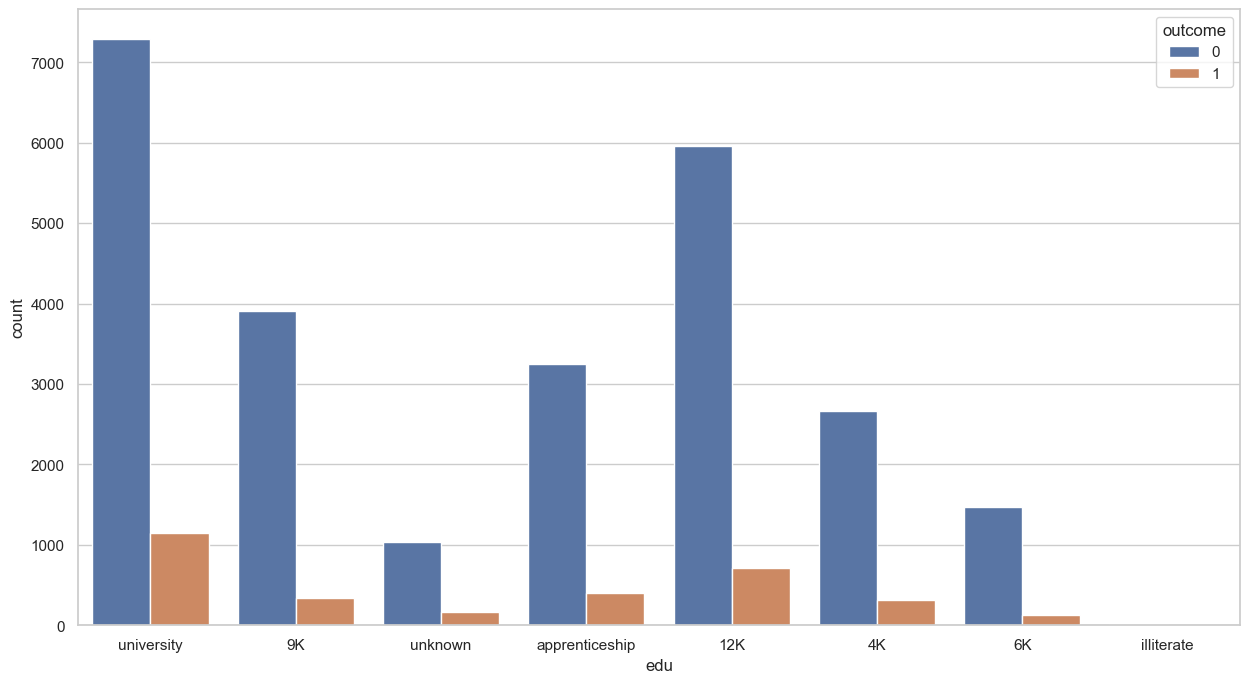

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="edu", hue="outcome", data=data)

From here we can see people with education level of university have the highest percentage of opening a saving account

## Feature: Home Loan 
This is a categorical feature which means "has housing loan", with the values "yes" and "no" and "unknown".

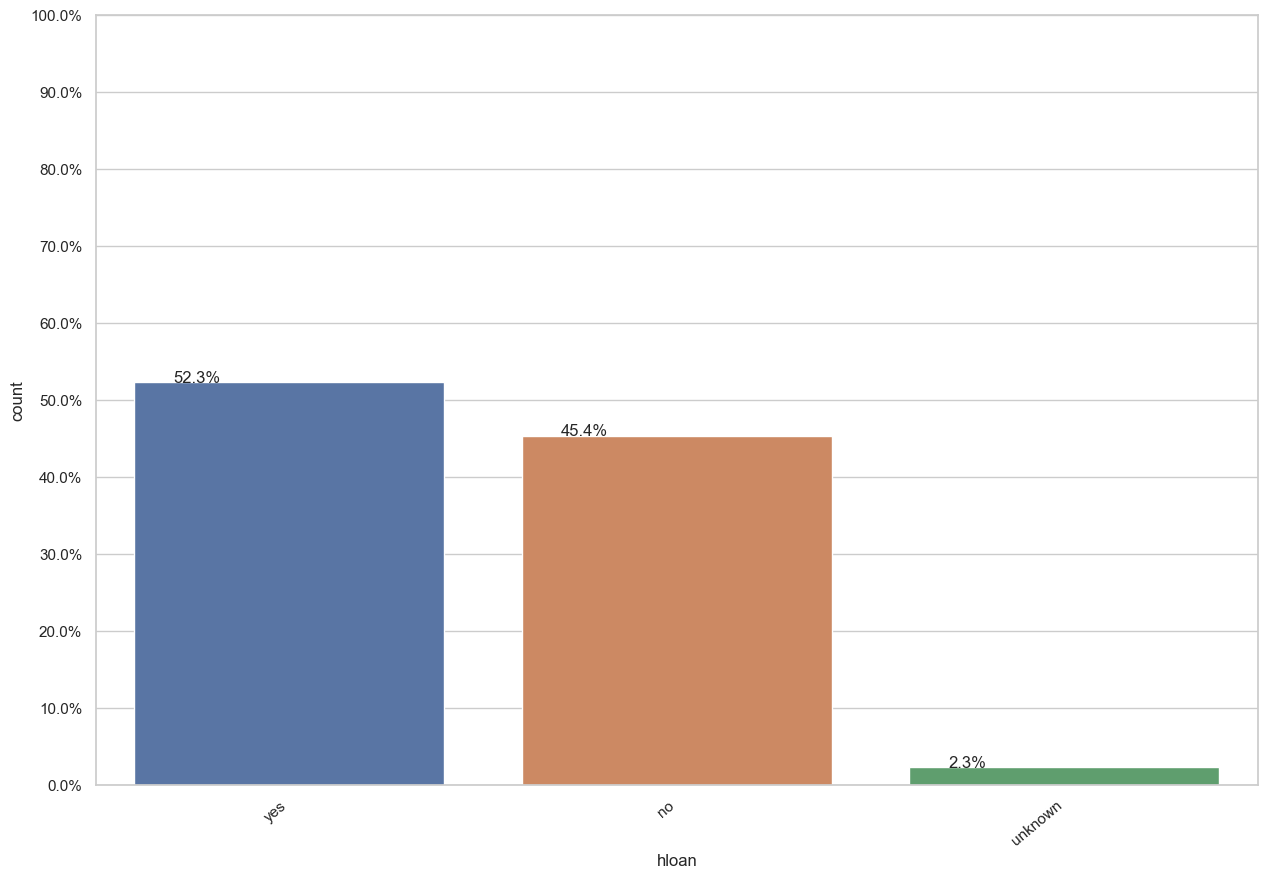

In [21]:
countplot("hloan", data)

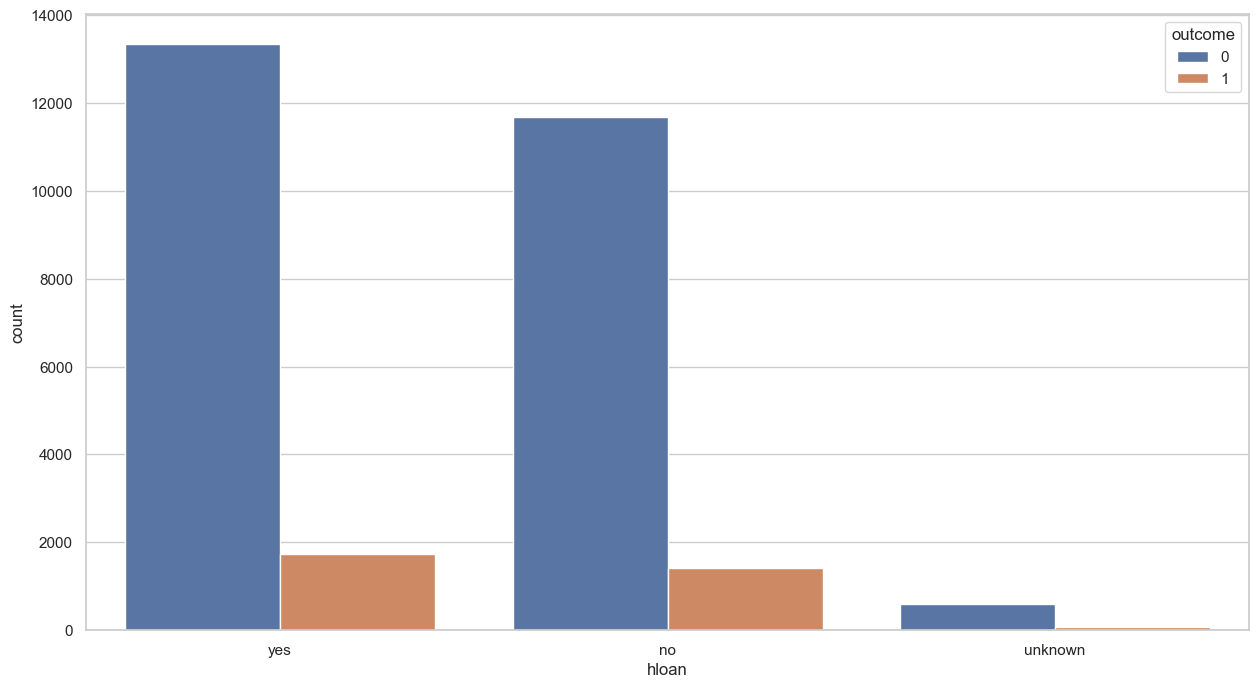

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="hloan", hue="outcome", data=data)

There are customer who have housing loan and have a saving account opened as well.

## Feature:Personal Loan
This is a categorical feature which means "has personal loan", with the values "yes" and "no" and "unknown".

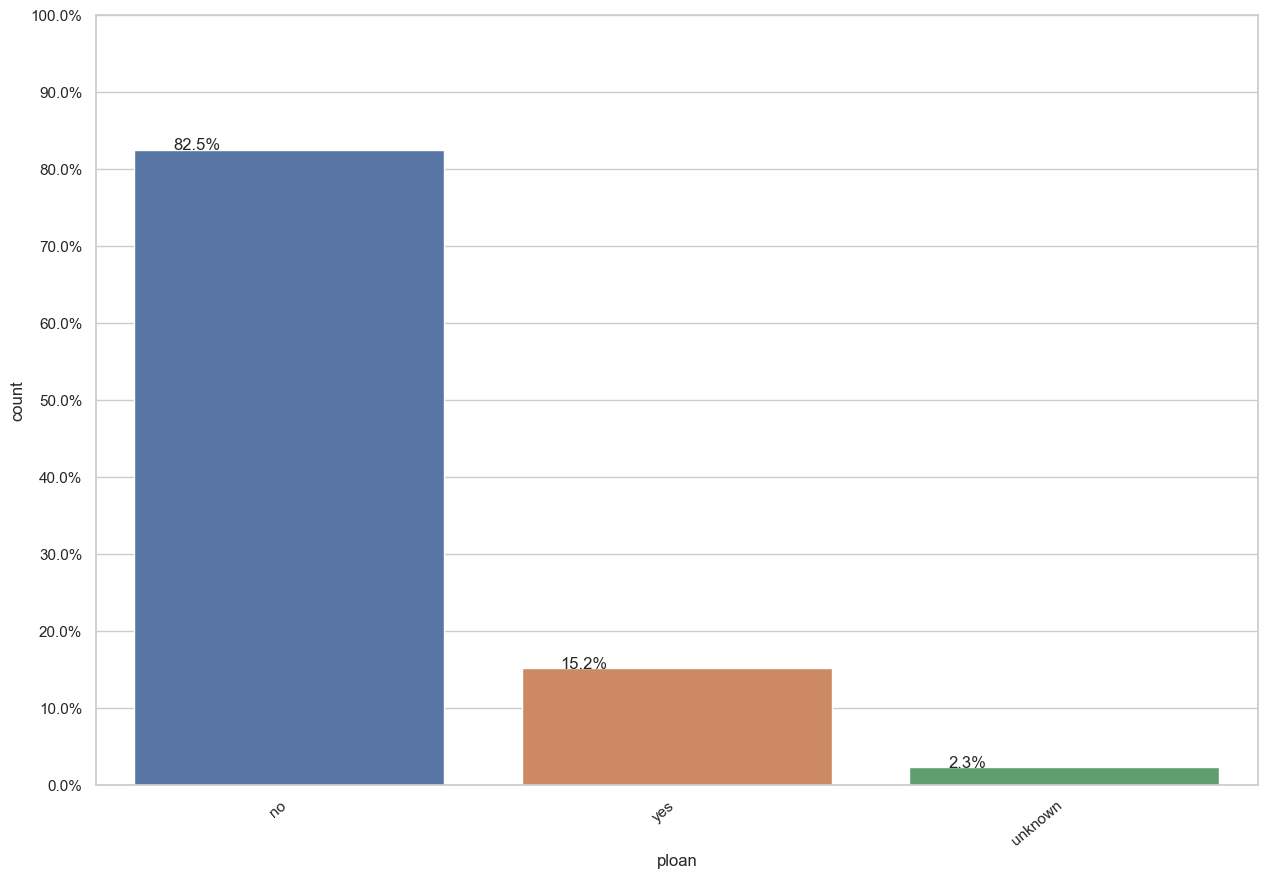

In [23]:
countplot("ploan", data)

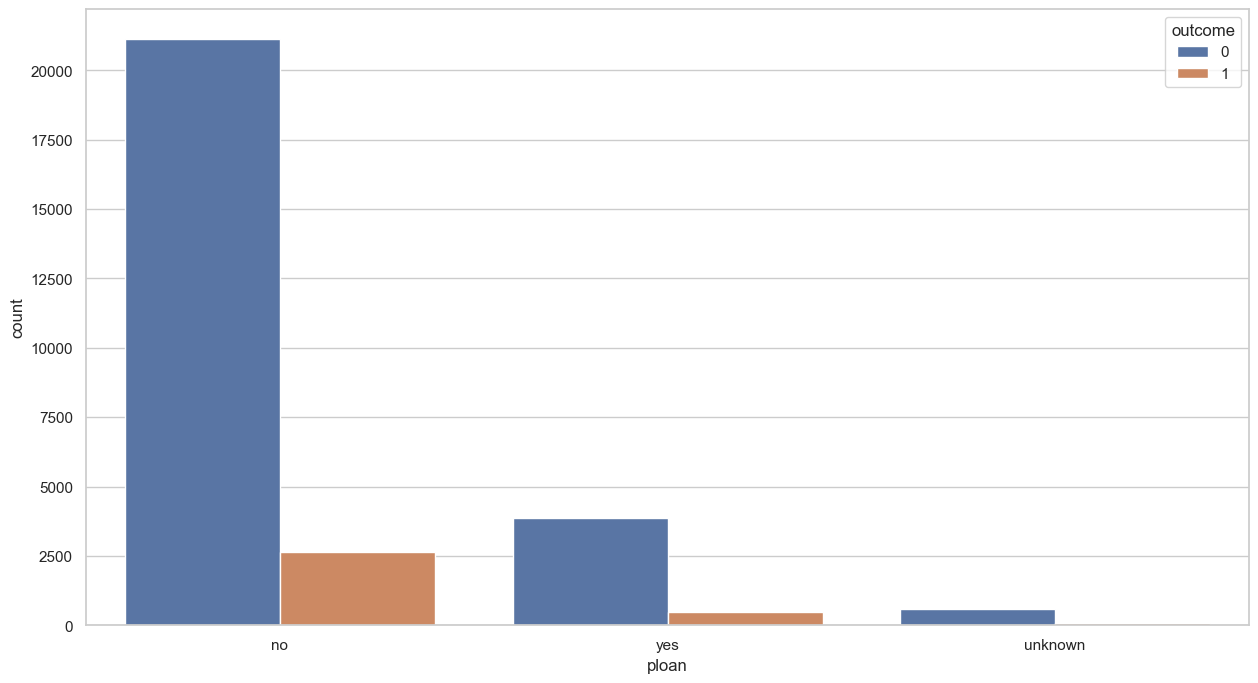

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="ploan", hue="outcome", data=data)

There are maximum number of customer who don't have personal loan and don't a saving account opened as well.

## Feature: Contact Communication Type
This is a categorical feature which means "which type of contact does the customer has", with the values "cellular" and "telephone"

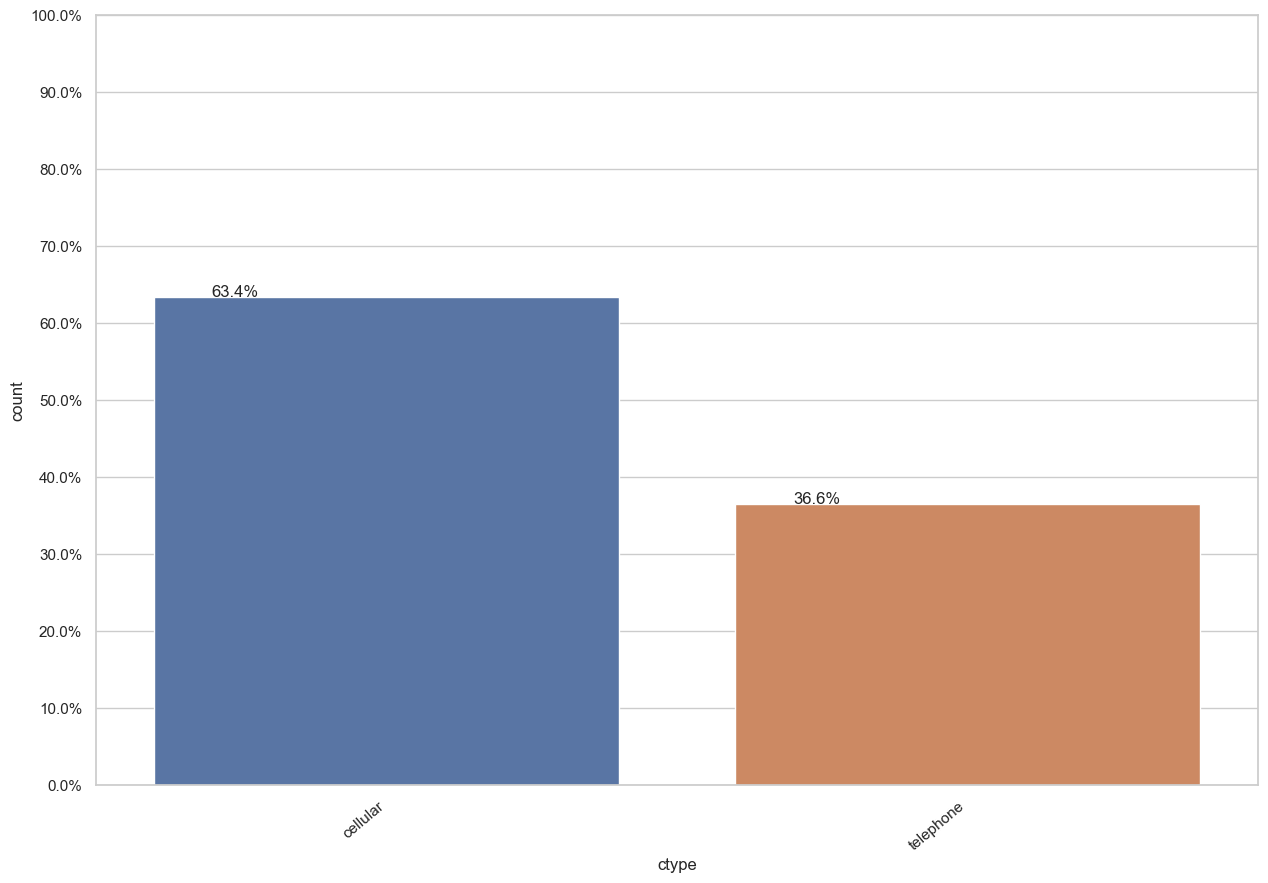

In [25]:
countplot("ctype", data)

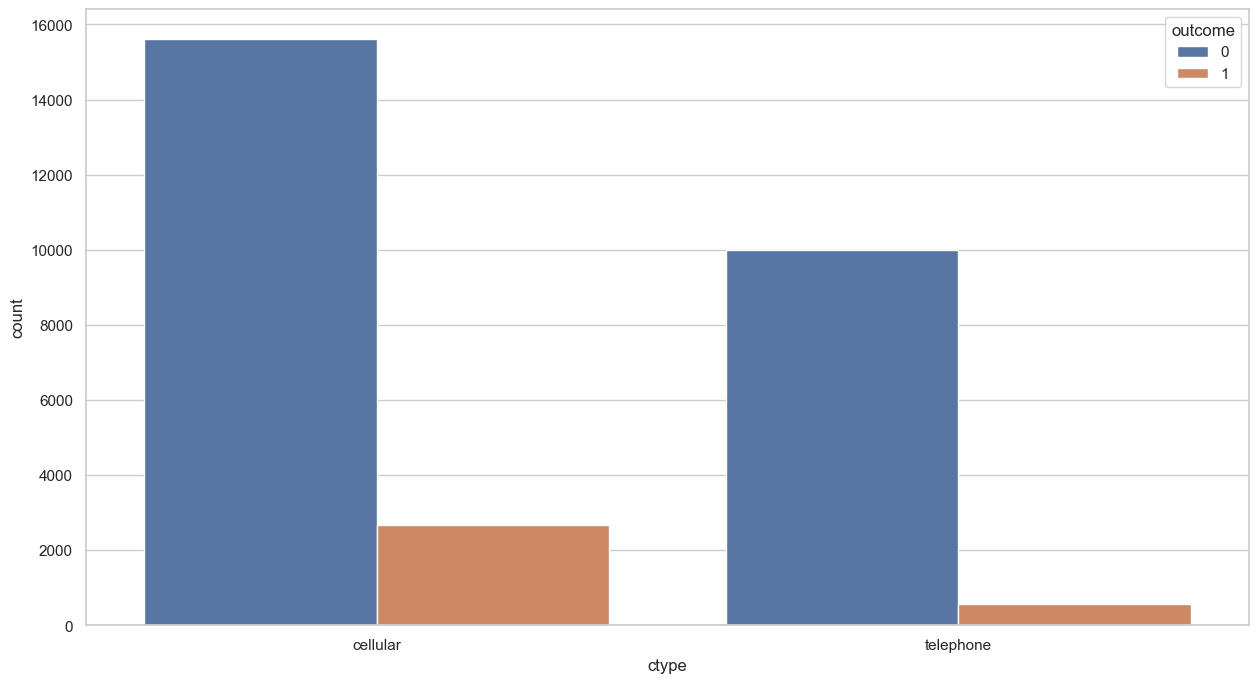

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="ctype", hue="outcome", data=data)

There are maximum number of customer who has cellular type connection and don't a saving account opened as well.

## Feature: Month
This is a categorical feature which means "last contact month of year", with the values such as("mar","apr","may", "jun","jul","aug","sept","oct","nov",dec")

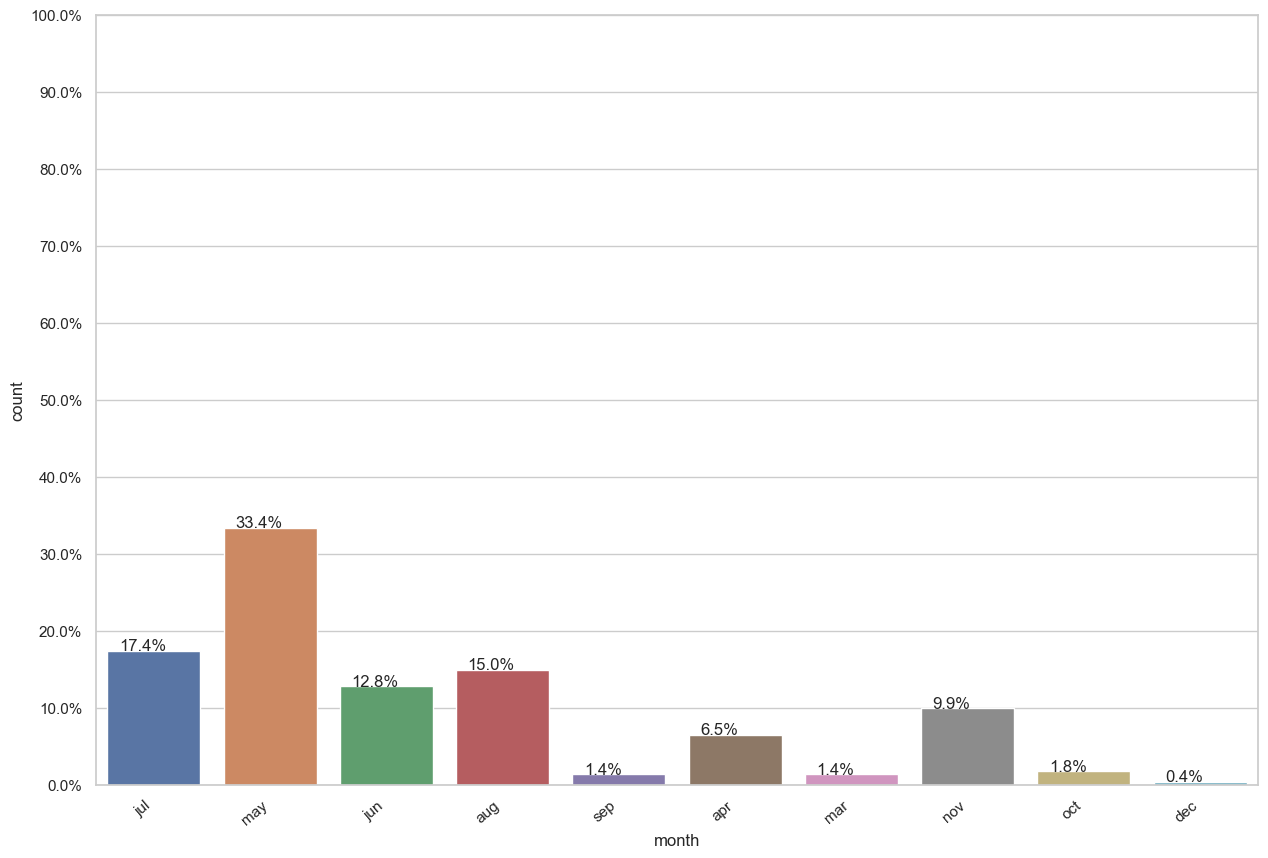

In [27]:
countplot("month", data)

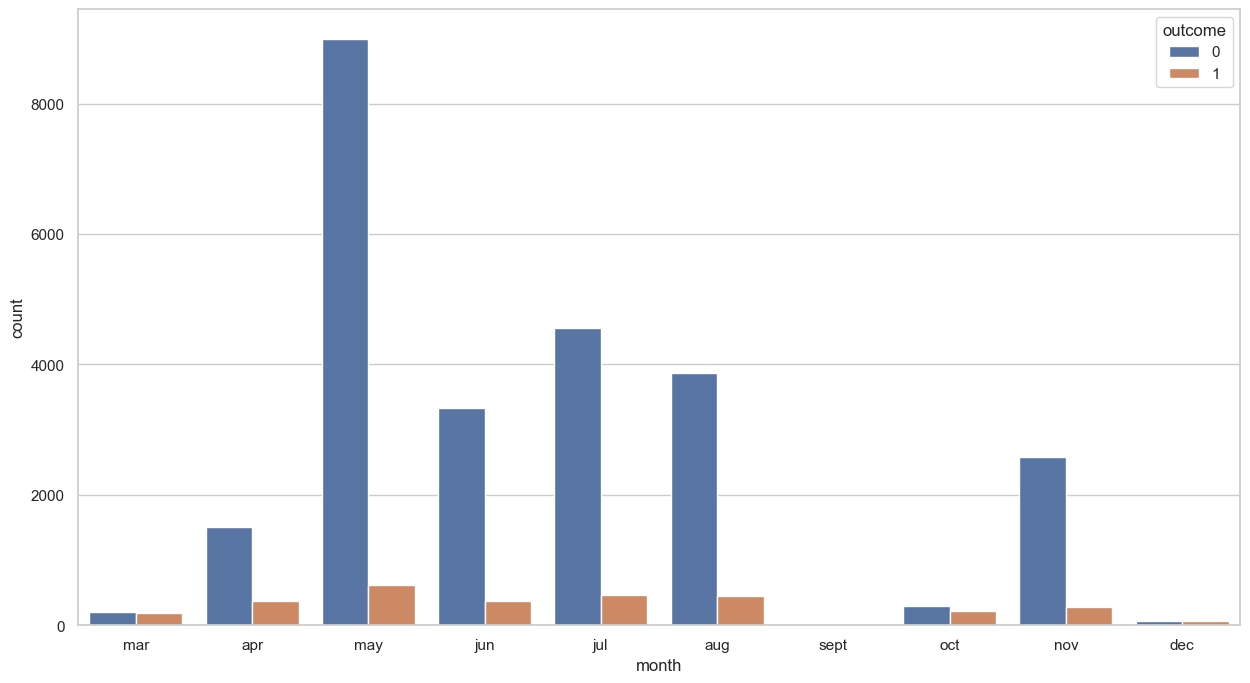

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="month", hue="outcome", data=data, order=["mar","apr","may", "jun","jul","aug","sept","oct","nov","dec"])

May was the highest Last contact month of the year and it is also the month with highest customers not opening saving account

## Feature: Last contact day of the week
This is a categorical feature which means "last contact day of the week", with the values such as("mon","tue","wed","thu","fri")

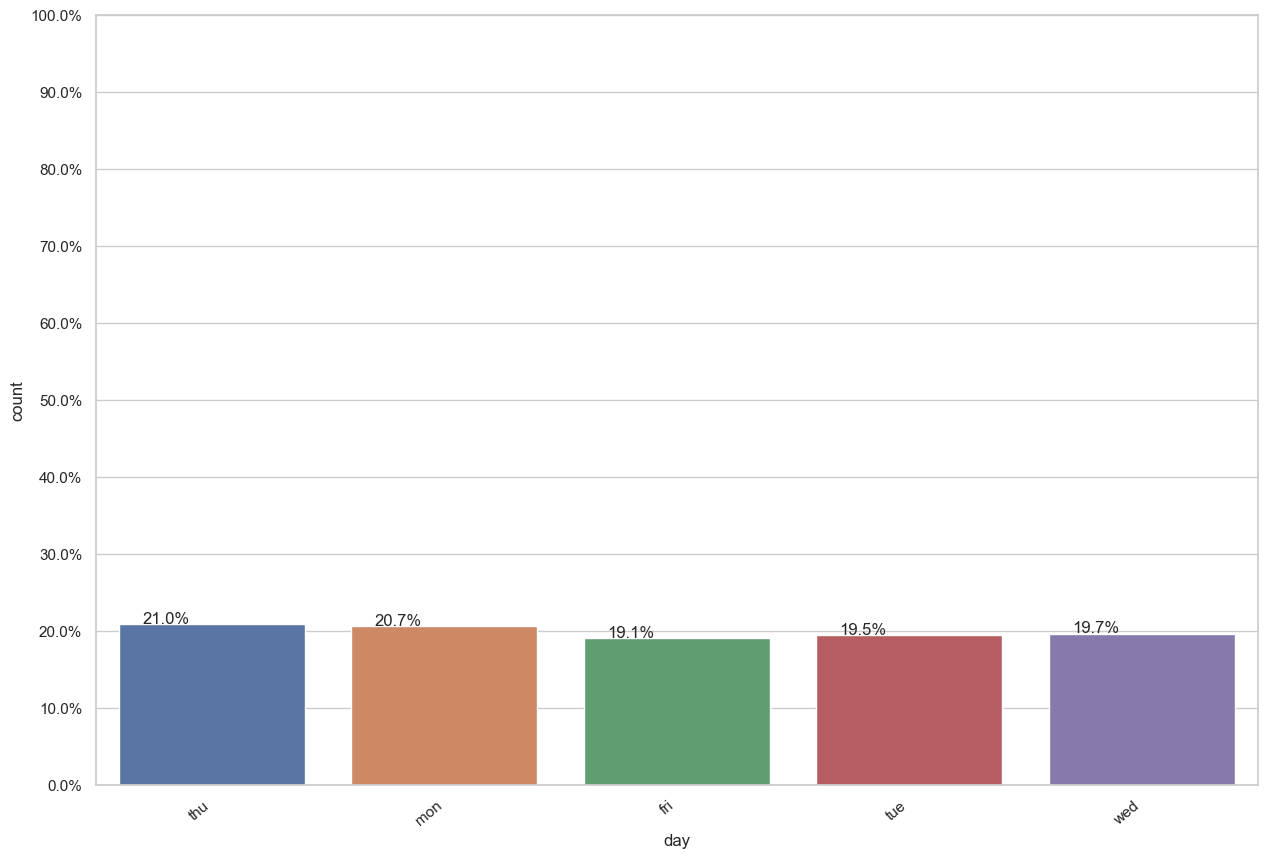

In [29]:
countplot("day", data)

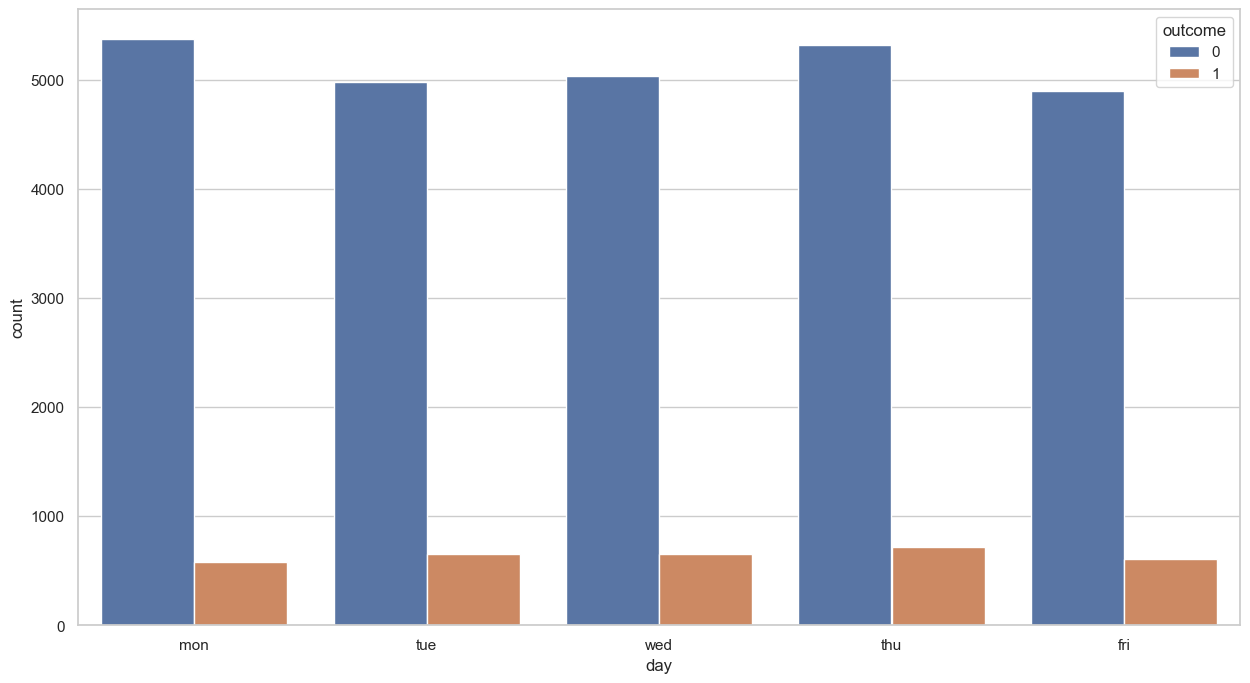

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="day", hue="outcome", data=data, order=['mon', 'tue', 'wed', 'thu', 'fri'])
plt.show()

## Feature: Outcome previous marketing campaigns

This feature indicates the outcome of the previous marketing campaign with values such as ("failure","nonexistent","success")

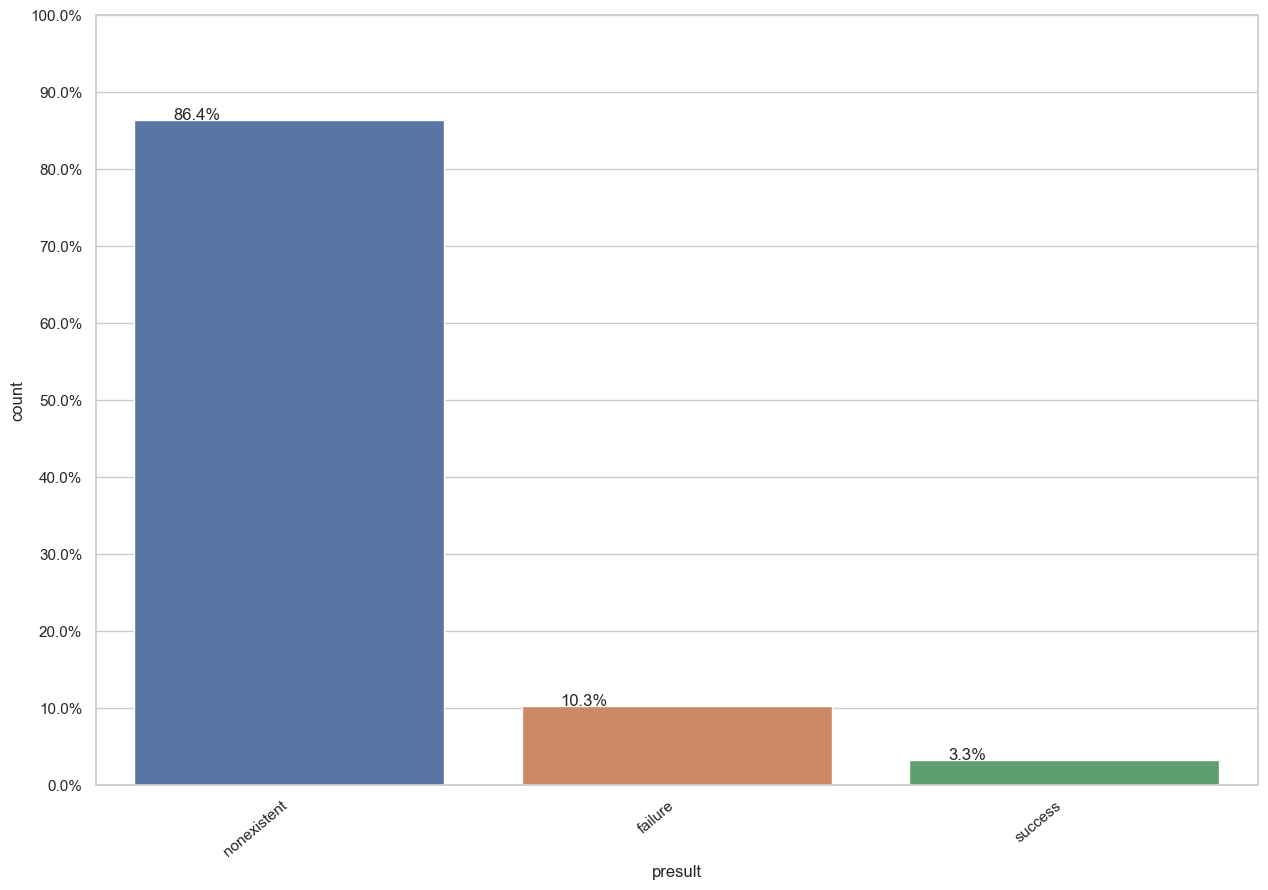

In [31]:
countplot("presult", data)

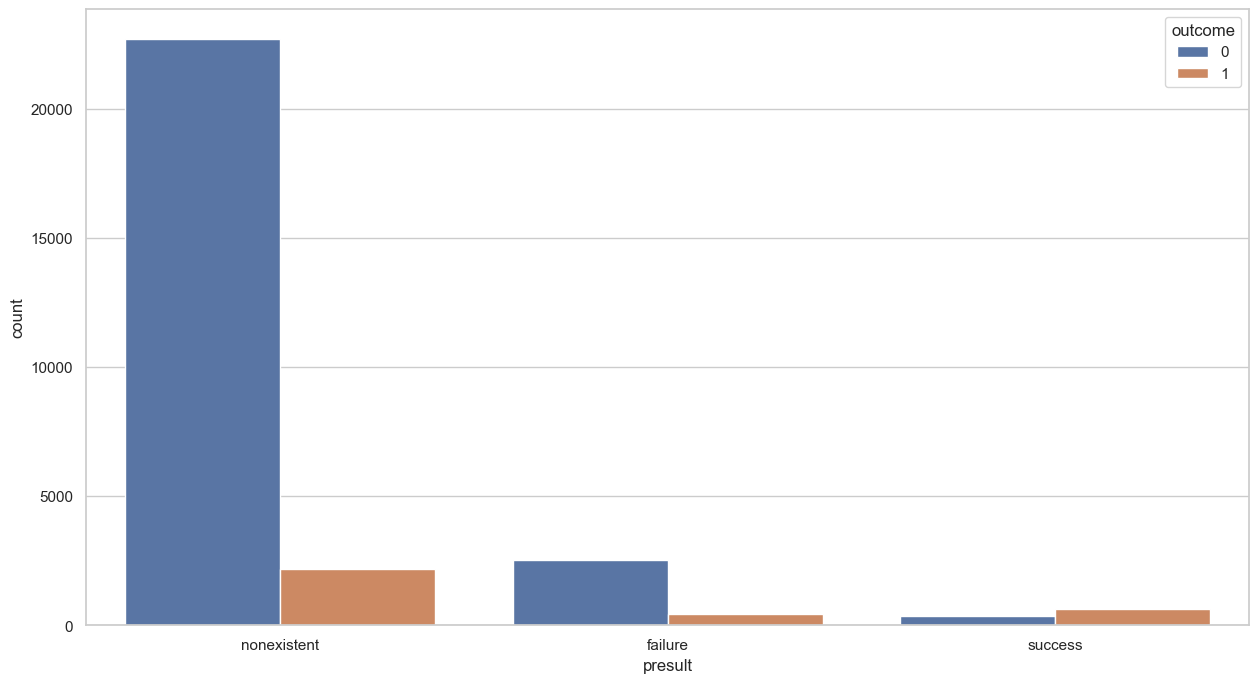

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
ax=sns.countplot(x="presult", hue="outcome", data=data)
plt.show()

## Feature: Age (Numeric)

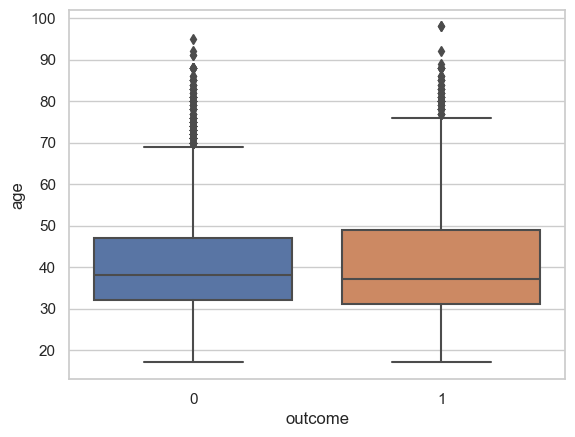

In [33]:
sns.boxplot(data=data, x="outcome", y="age")
plt.show()

From the above boxplot we know that for both the customers that opened or didn't opened a saving account, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will open and which customer will not.

/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

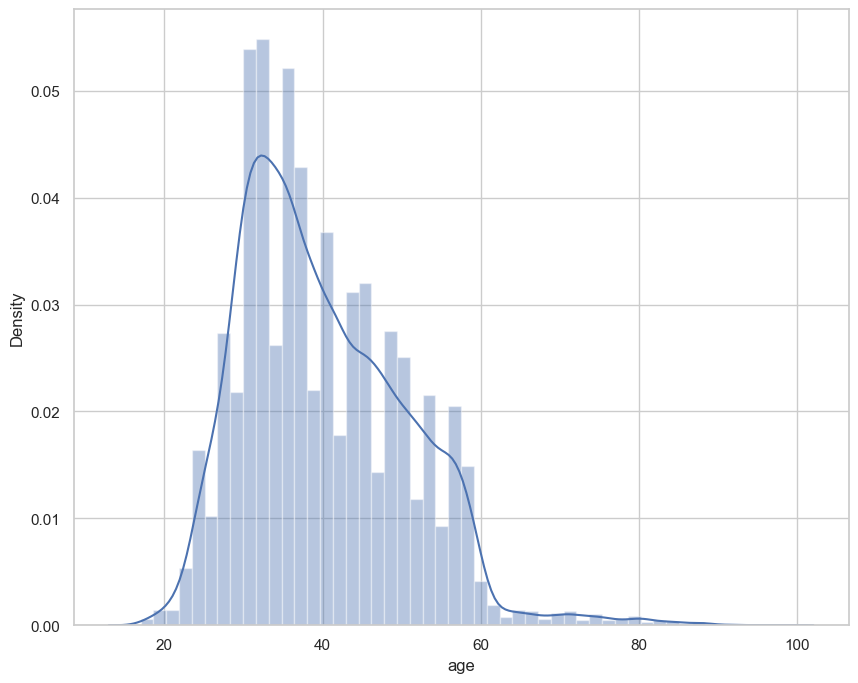

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

## Feature: Ccontact 
This feature indicates the current number of contacts performed during this campaign and for this client 

/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


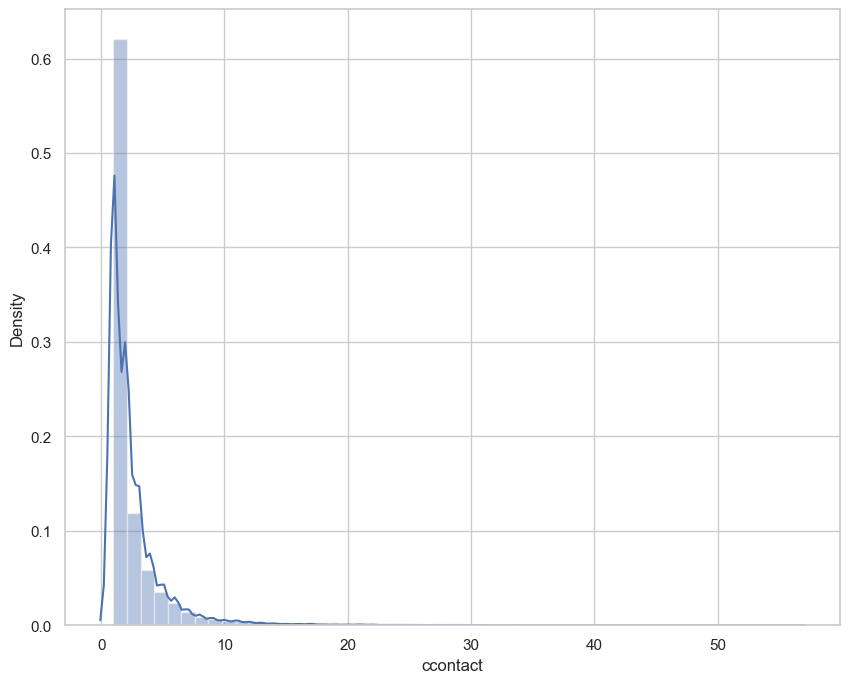

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(data["ccontact"])
plt.show()

## Feature: lcdays 
This feature indicates number of days that passed by since client was last contacted by a previous campaign where  numeric; 999 means client was not previously contacted

In [36]:
data["lcdays"].unique()

array([999,   6,   3,   2,   5,  10,   4,   9,  12,  16,   1,   7,   8,
        15,  11,  13,   0,  18,  14,  19,  17,  21,  22,  27,  26])

In [37]:
data["lcdays"].value_counts()

999    27766
3        299
6        291
4         78
9         45
7         45
12        43
10        40
5         39
2         38
13        30
11        21
1         15
15        15
14        14
0         13
8         13
16         7
17         6
18         5
19         2
21         2
22         2
27         1
26         1
Name: lcdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


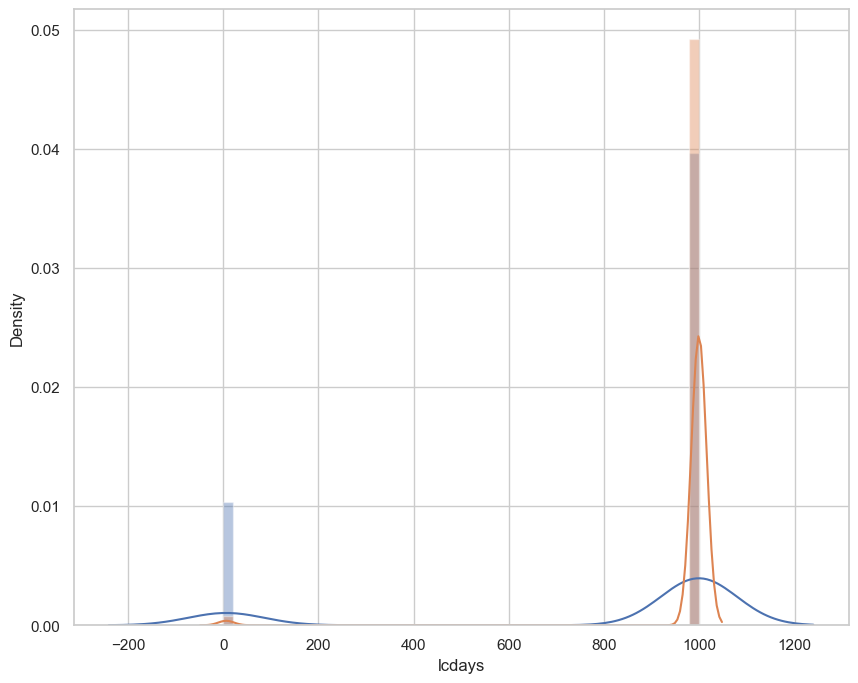

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(data[data["outcome"]==1]["lcdays"])
sns.distplot(data[data["outcome"]==0]["lcdays"])
plt.show()

## Feature: pcontact 
This feature indicates number of contacts performed before this campaign and for this client

In [39]:
data["pcontact"].unique()

array([0, 1, 4, 2, 3, 5, 7, 6])

In [40]:
data["pcontact"].value_counts()

0    24910
1     3192
2      527
3      145
4       44
5       11
7        1
6        1
Name: pcontact, dtype: int64

In [41]:
data[data["outcome"]==1]["pcontact"].value_counts()

0    2178
1     680
2     242
3      77
4      23
5       9
Name: pcontact, dtype: int64

In [42]:
data[data["outcome"]==0]["pcontact"].value_counts()

0    22732
1     2512
2      285
3       68
4       21
5        2
7        1
6        1
Name: pcontact, dtype: int64

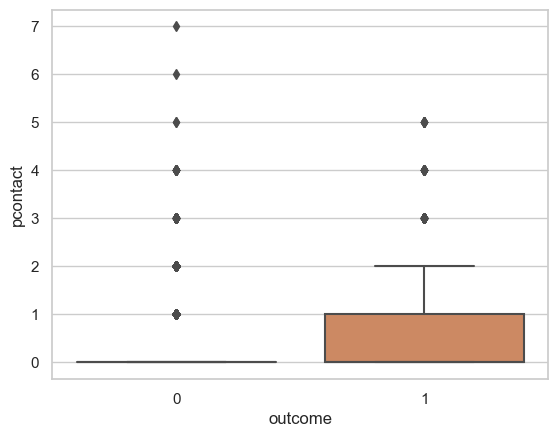

In [43]:
sns.boxplot(data=data, x="outcome", y="pcontact")
plt.show()

/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


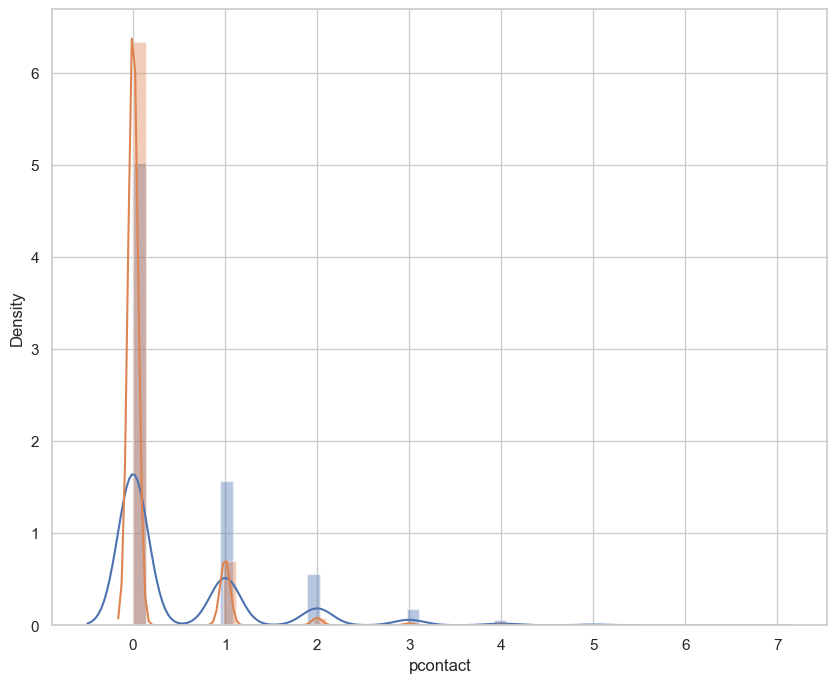

In [44]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["outcome"]==1]["pcontact"])
sns.distplot(data[data["outcome"]==0]["pcontact"])
plt.show()

The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.

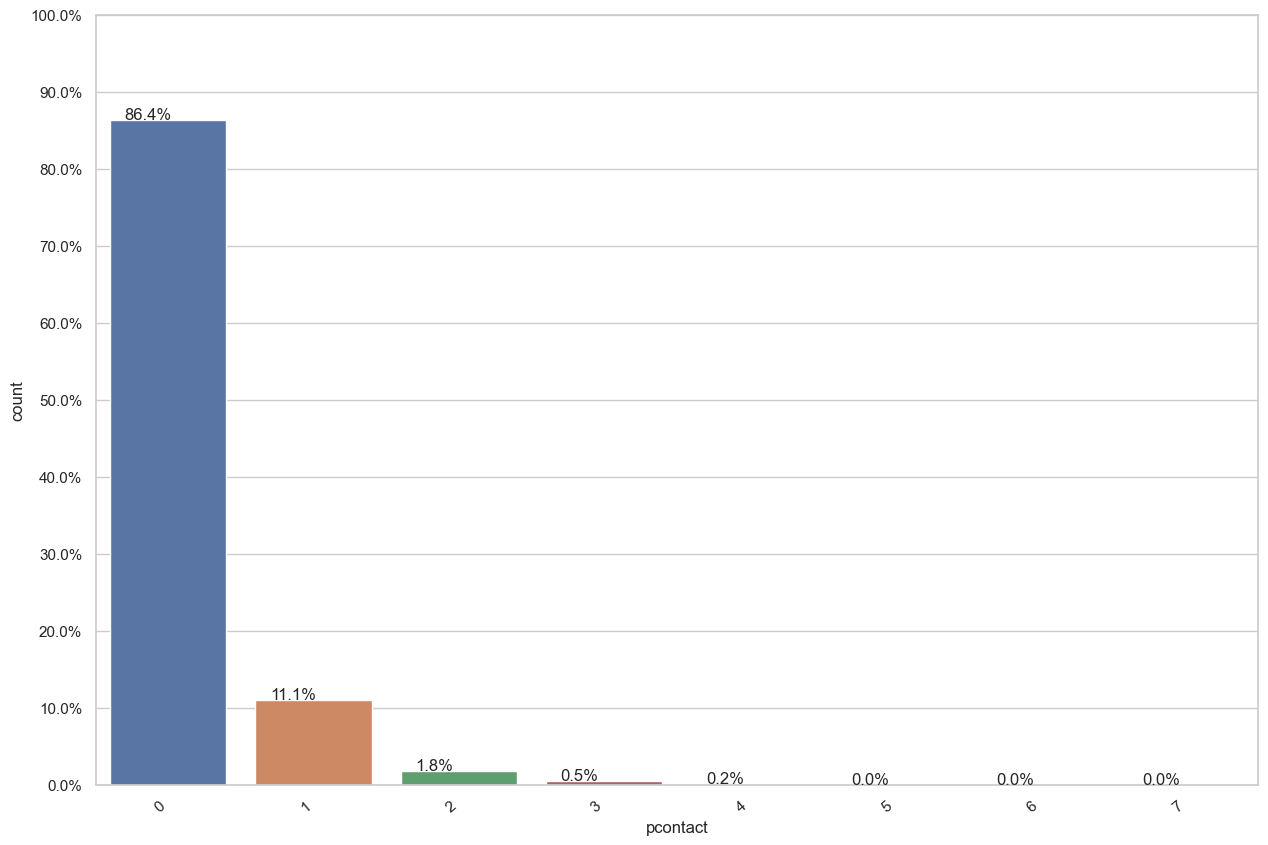

In [45]:
countplot("pcontact", data)

## Feature: Employment 
This feature indicates employment variation rate

In [46]:
data["employment"].value_counts()

 1.4    11355
-1.8     6440
 1.1     5447
-0.1     2582
-2.9     1154
-3.4      769
-1.7      533
-1.1      425
-3.0      120
-0.2        6
Name: employment, dtype: int64

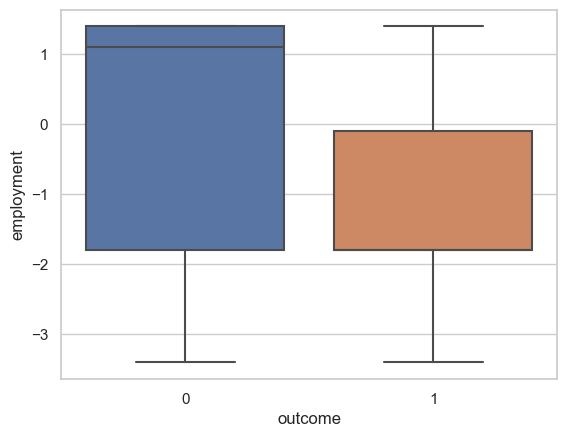

In [47]:
%matplotlib inline
sns.boxplot(data=data, x="outcome", y="employment")
plt.show()

/Users/mohil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


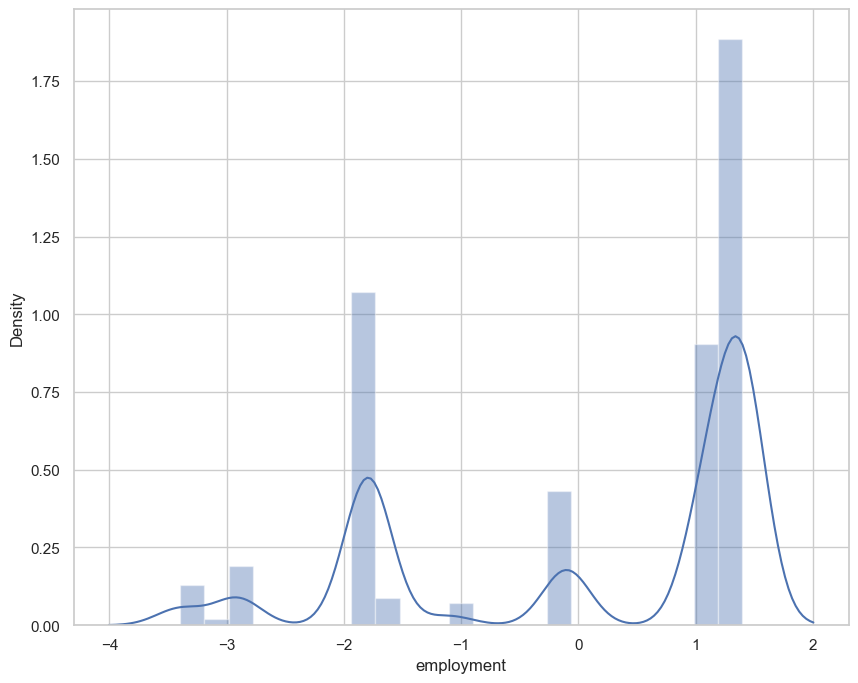

In [48]:
plt.figure(figsize=(10,8))
sns.distplot(data["employment"])
plt.show()

## Feature: cprice 
This feature indicate  consumer price index

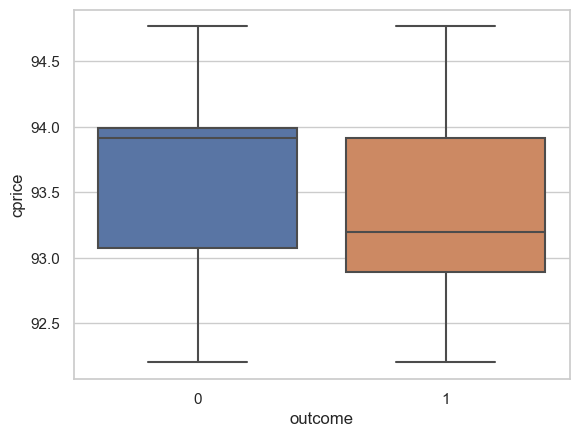

In [49]:
sns.boxplot(data=data, x="outcome", y="cprice")
plt.show()

## Feature: cconf 
This feature indicate consumer confidence index

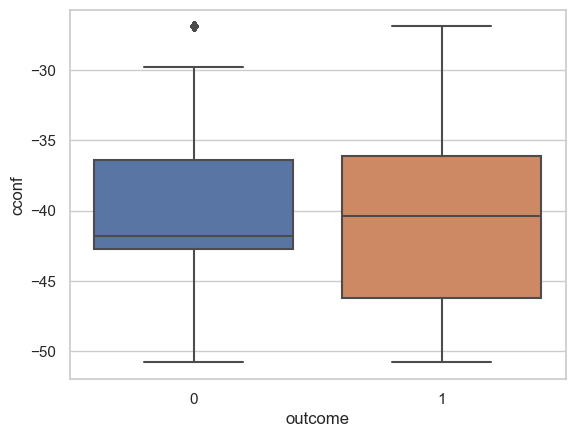

In [50]:
%matplotlib inline
sns.boxplot(data=data, x="outcome", y="cconf")
plt.show()

## Feature: euri3 
This feature indicate euribor 3 month rate - daily indicator

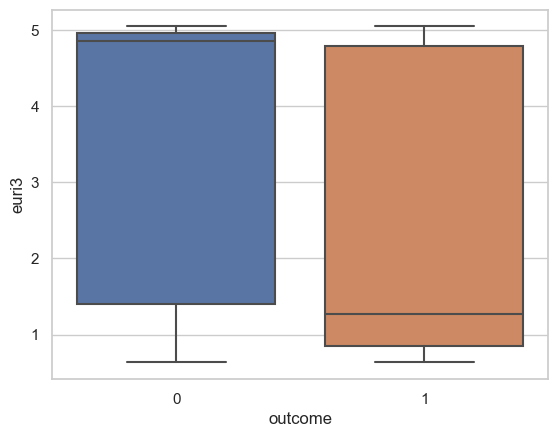

In [51]:
sns.boxplot(data=data, x="outcome", y="euri3")
plt.show()

## Feature:  employees 
This feature indicate number of employees

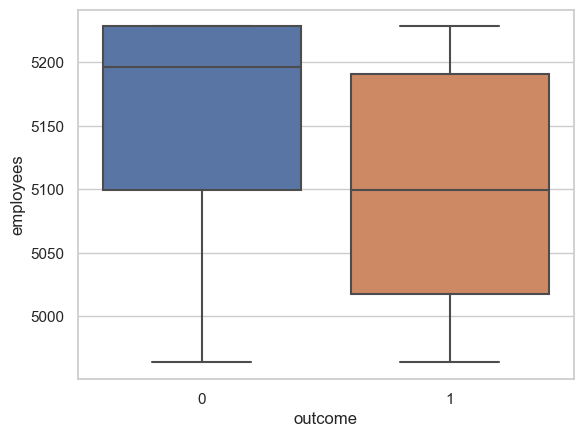

In [52]:
%matplotlib inline
sns.boxplot(data=data, x="outcome", y="employees")
plt.show()

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

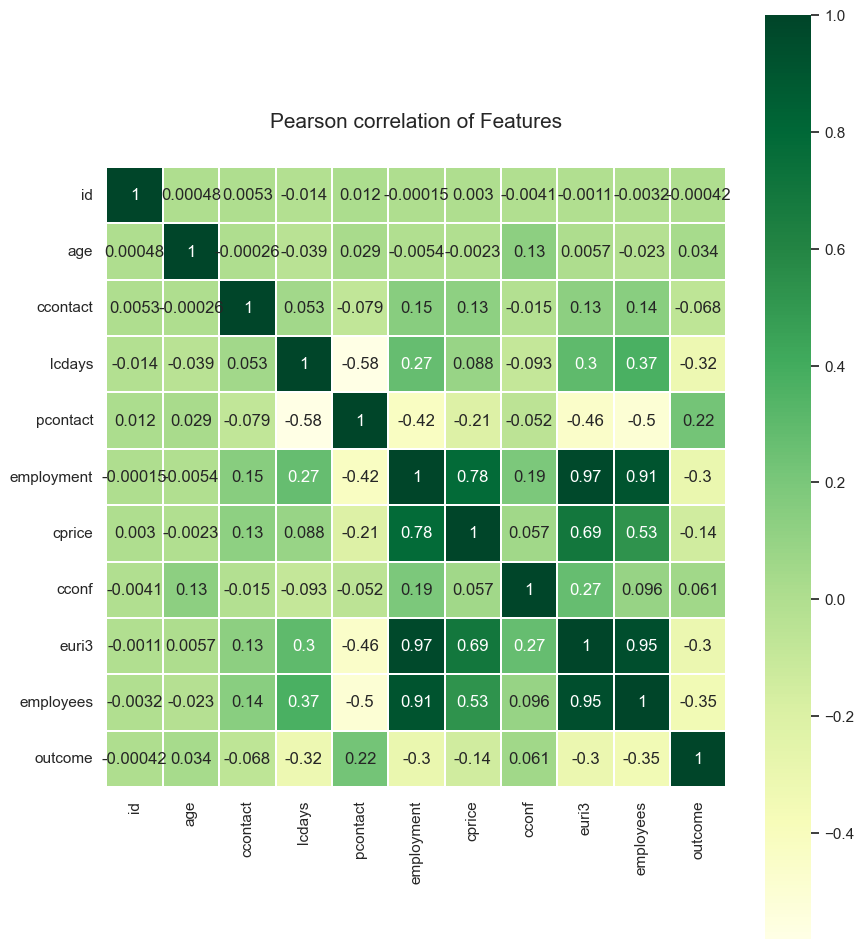

In [53]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g employees and euri3 these features share a correlation value of 0.95, and euri3 and employment share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

# Data Preprocessing

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [56]:

data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28831 non-null  int64  
 1   age         28831 non-null  int64  
 2   job         28831 non-null  object 
 3   civil       28831 non-null  object 
 4   edu         28831 non-null  object 
 5   credit      28831 non-null  object 
 6   hloan       28831 non-null  object 
 7   ploan       28831 non-null  object 
 8   ctype       28831 non-null  object 
 9   month       28831 non-null  object 
 10  day         28831 non-null  object 
 11  ccontact    28831 non-null  int64  
 12  lcdays      28831 non-null  int64  
 13  pcontact    28831 non-null  int64  
 14  presult     28831 non-null  object 
 15  employment  28831 non-null  float64
 16  cprice      28831 non-null  float64
 17  cconf       28831 non-null  float64
 18  euri3       28831 non-null  float64
 19  employees   28831 non-nul

## Dealing with Missing data

From the above basic info of each feature, we know that there are no missing values in this dataset.

In [57]:
data.shape

(28831, 21)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess data
label_encoder = LabelEncoder()
cat_cols = ['job', 'civil', 'edu', 'credit', 'hloan', 'ploan', 'ctype', 'month', 'day', 'presult']
for col in cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

y = train_data['outcome']
X = train_data.drop(['outcome', 'id'], axis=1)
test_ids = test_data['id']
test_data = test_data.drop('id', axis=1)

# Apply PCA
pca = PCA(n_components=19)
X = pca.fit_transform(X)
test_data = pca.transform(test_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Define neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(19,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Train neural network
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)
print(accuracy_score(y_test, y_pred_binary))

# Generate submission file
test_pred = model.predict(test_data)
final = pd.DataFrame()
final['id'] = test_ids
final['outcome'] = pd.DataFrame(test_pred)
final.to_csv('submission1234578.csv', index=False)